# Get Point of Interest Data

In [ ]:
!pip install geopandas

In [1]:
# If you see the error `ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed` this can be ignored.
import os
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import shapely

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


## Download data

Download Point of Interest (POI) data, prepared by Geofabrik: http://download.geofabrik.de/africa/south-africa.html (also see the [different locations](http://download.geofabrik.de/index.html) available).

In [ ]:
!wget http://download.geofabrik.de/africa/south-africa-latest-free.shp.zip

In [ ]:
!mkdir -p south-africa-latest-free.shp
!unzip south-africa-latest-free.shp.zip -d south-africa-latest-free.shp

## Filter data down to our Area of Interest (AOI)

In [36]:
# read in shape from WKT file  with our AOI
WKT_FILE = 'Port_Elizabeth.wkt'

with open(WKT_FILE) as f:
    wkt = f.read()
    
shape = shapely.wkt.loads(wkt)

In [37]:
# Path to Geofabrik shp files folder
GEOFDIR = Path('south-africa-latest-free.shp/')

In [38]:
# read in all POIs from file
gdf = geopandas.read_file(GEOFDIR / 'gis_osm_pois_free_1.shp')

In [39]:
# select only those inside our AOI
aoi_gdf = gdf[gdf.within(shape)].reset_index(drop=True)

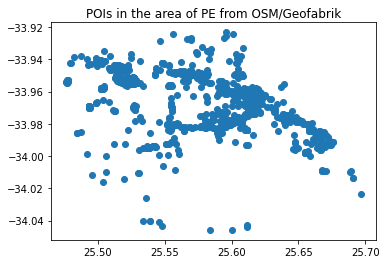

In [40]:
aoi_gdf.plot()
plt.title("POIs in the area of PE from OSM/Geofabrik")
plt.show()

In [41]:
len(aoi_gdf) # amount of POIs in area 

1058

In [42]:
# top 20 categories available in PE
aoi_gdf['fclass'].value_counts().head(20)

swimming_pool     159
guesthouse        139
restaurant         88
fast_food          60
supermarket        41
cafe               39
school             30
convenience        30
atm                25
bank               23
hotel              20
pharmacy           20
clothes            19
beverages          18
post_box           16
pub                15
car_dealership     15
telephone          14
bar                13
sports_centre      13
Name: fclass, dtype: int64

In [43]:
# Save to geojson file we can use in MARS
res = Path("./GeodataBlueprint/Resources")
res.mkdir(parents=True, exist_ok=True)

# if the file already exists make a backup
if (res / 'pois.geojson').is_file():
    now = dt.datetime.now()
    os.rename(res / 'pois.geojson', res / f'bkp_pois_{now.strftime("%Y%m%d_%H%M%S")}.geojson')

aoi_gdf.to_file(res / "pois.geojson", driver="GeoJSON")

/opt/homebrew/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
